Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
#Read the dataset
df = pd.read_csv('height_weight_dataset.csv')
df.head()

,Height_cm,Weight_kg
0,174.97,150.39
1,168.62,149.65
2,176.48,157.12
3,185.23,162.70
4,167.66,150.09


Text(0, 0.5, 'Height (cm)')

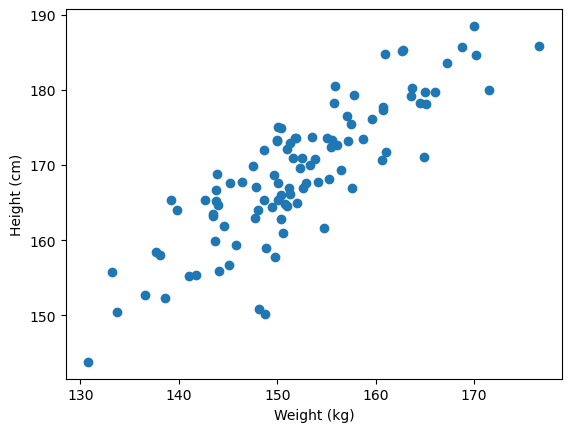

In [8]:
plt.scatter(df['Weight_kg'], df['Height_cm'])
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')

In [ ]:
# EDA
df.info

<bound method DataFrame.info of     Height_cm  Weight_kg
0      174.97     150.39
1      168.62     149.65
2      176.48     157.12
3      185.23     162.70
4      167.66     150.09
..        ...        ...
95     155.36     141.75
96     172.96     151.25
97     172.61     156.12
98     170.05     153.34
99     167.65     145.17

[100 rows x 2 columns]>

In [11]:
df.describe()

,Height_cm,Weight_kg
count,100.000000,100.000000
mean,168.961600,152.176800
std,9.082117,8.882978
min,143.800000,130.810000
25%,163.987500,147.282500
50%,168.730000,151.230000
75%,174.062500,157.255000
max,188.520000,176.640000


In [12]:
df.isnull().sum()

Height_cm    0
Weight_kg    0
dtype: int64

In [13]:
# Divide our dataset into independent and dependent features 
X = df[['Weight_kg']]
y = df['Height_cm']

In [15]:
X.shape , y.shape

((100, 1), (100,))

In [16]:
# divide the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 1), (30, 1), (70,), (30,))

In [ ]:
#standard scaling on train and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[-0.1806879 ],
       [ 0.78582907],
       [-0.06691629],
       [-0.21536116],
       [-1.23822217],
       [-0.41148176],
       [ 0.8887653 ],
       [ 0.18771543],
       [-1.42784154],
       [-0.21969531],
       [-0.20344223],
       [-1.36391272],
       [ 1.77401683],
       [-0.71162212],
       [-0.08425291],
       [-0.25220149],
       [ 0.15520925],
       [ 0.55936938],
       [ 0.33182614],
       [ 1.90620862],
       [ 0.58429078],
       [-0.91207687],
       [-1.59579011],
       [-0.92074518],
       [-0.97383861],
       [-0.321548  ],
       [ 0.90610193],
       [-0.12651094],
       [ 0.5517846 ],
       [-0.01382286]])

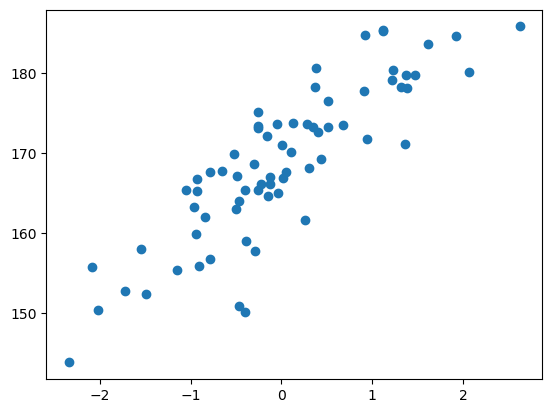

In [24]:
plt.scatter(X_train, y_train)

In [25]:
# Model training - Applying Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [26]:
## Training the train data
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
regressor.intercept_

168.72442857142855

In [28]:
regressor.coef_

array([8.25488041])

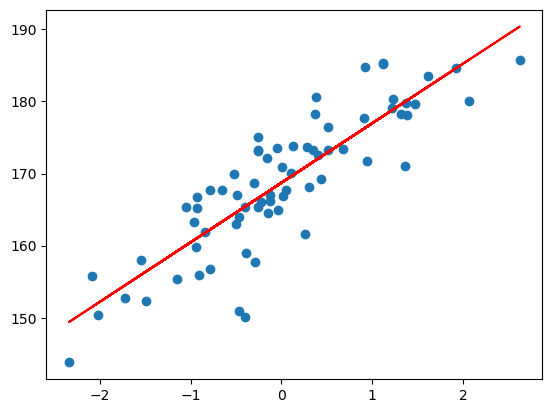

In [31]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train),'r')

Prediction of train data
1. predicted height output = intercept + coef_ * (Weights)
2. y_pred_train = 168.72442857142855 + 8.25488041(X_train)

Prediction of test data
1. predicted height output = intercept + coef_ * (Weights)
2. y_pred_test = 168.72442857142855 + 8.254880(X_test)

In [32]:
# Prediction on test data
y_pred_test = regressor.predict(X_test)

In [33]:
y_pred_test

array([167.23287154, 175.21135359, 168.17204263, 166.94664797,
       158.50305261, 165.32769589, 176.06107982, 170.27399699,
       156.93776746, 166.91087002, 167.04503732, 157.46549217,
       183.36872538, 162.8500731 , 168.02893085, 166.64253542,
       170.00566239, 173.34195589, 171.46361371, 184.45995275,
       173.54767909, 161.19534308, 155.55137203, 161.12378719,
       160.68550734, 166.07008828, 176.20419161, 167.68009587,
       173.27934449, 168.61032248])

In [34]:
y_test

83    164.82
53    176.12
70    173.61
45    162.80
44    155.21
39    171.97
22    170.68
80    167.80
10    165.37
0     174.97
18    160.92
30    163.98
73    185.65
33    159.42
90    170.97
4     167.66
76    170.87
77    167.01
12    172.42
31    188.52
55    179.31
88    164.70
26    158.49
42    168.84
69    163.55
15    164.38
40    177.38
96    172.96
9     175.43
72    169.64
Name: Height_cm, dtype: float64

In [35]:
## Accuracy of the model - Performance metrics - MAE, MSE, RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [36]:
mse = mean_squared_error(y_test, y_pred_test)

In [37]:
mae = mean_absolute_error(y_test, y_pred_test)

In [38]:
rmse = np.sqrt(mse)

In [39]:
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 20.134183862151154
Mean Absolute Error: 3.8607506032941634
Root Mean Squared Error: 4.487113087738168


In [ ]:
## Accuracy of the model - R squared value and Adjusted R squared value
# r2 = 1 - (SS_res / SS_tot)
from sklearn.metrics import r2_score

In [41]:
score = r2_score(y_test, y_pred_test)
score

0.6342104759907417

In [43]:
#adjusted r squared value
# adjusted r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.6211465644189824

In [44]:
scaler

StandardScaler()

In [45]:
regressor

LinearRegression()